In [13]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import cv2
%matplotlib inline

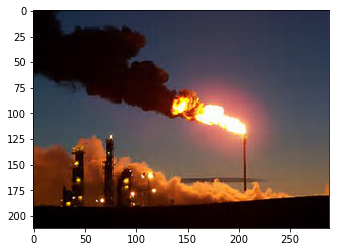

In [14]:
image = mpimg.imread('./th.jpg')
plt.imshow(image)


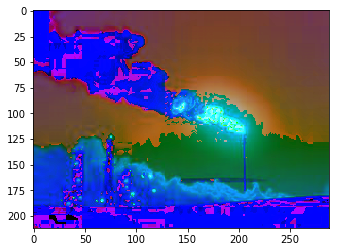

In [15]:
hlsimage = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
plt.imshow(hlsimage)
hlsfile = './hlsimage.jpg'
mpimg.imsave(hlsfile, hlsimage)

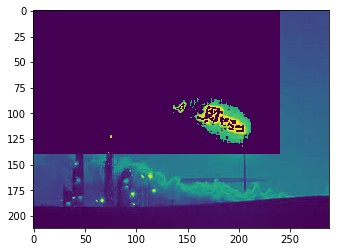

In [16]:

#flame = [:,:,1]>200
flame = hlsimage[:,:,1]
for x in range(0,140):
    for y in range(0,240):
        if flame[x,y]<160 or hlsimage[x,y,0]>50:
            flame[x,y]=0
        y +=1
    x+=1
plt.imshow(flame)
flamefile = './flame.jpg'
mpimg.imsave(flamefile, flame)
   
    

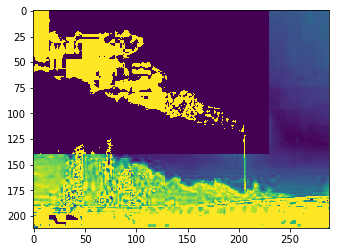

In [17]:
# smoke = [;,;,1]<100 and [:,:,2] >200
# smoke = [;,;,1]<100 and [:,:,2] >200
smoke = hlsimage[:,:,2]
for x in range(0,140):
    for y in range(0,230):
        if hlsimage[x,y,1]<150 and hlsimage[x,y,2]>200 and hlsimage[x,y,0]<100:
            smoke[x,y]=255
        else:
            smoke[x,y]=0
plt.imshow(smoke)
plt.imshow(smoke)
smokefile = './smoke.jpg'
mpimg.imsave(smokefile, smoke)            

In [18]:
smokearea = 0
for y in range(0, 230):
    x = 0
    for x in range(0,130):
        #find the minimum Y
        if smoke[x,y]>0:
            smokearea += 1
        x += 1
    y += 1    
    
print('smoke Area ',smokearea)


smoke Area  5791


In [19]:
flamearea = 0
for y in range(0, 230):
    x = 0
    for x in range(0,130):
        #find the minimum Y
        if flame[x,y]>0:
            flamearea += 1
        x += 1
    y += 1    
    
print('Flame Area ',flamearea)


Flame Area  1219


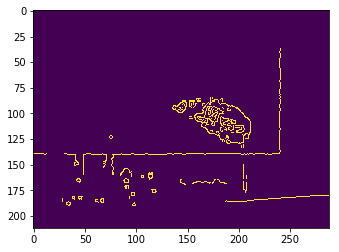

In [20]:
blur = cv2.GaussianBlur(flame,(3,3),0)
canny = cv2.Canny(blur,200, 255)
plt.imshow(canny)

Flame Height  85
Flame Bottom 129
Flame Left  74
Flame Right  211
Flame Envelope Area  1780


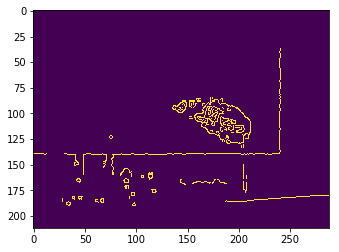

In [21]:
plt.imshow(canny)
points = []
minx = 250
miny = 250
maxx = 0
maxy = 0
area = 0
for y in range(0, 230):
    x = 0
    yhit =y
    xhit1 = 120
    xhit2 = 0
    for x in range(0,130):
        #find the minimum Y
        if canny[x,y]>0:
            point = [x,y]
            if x<xhit1:
                xhit1 = x
            if x>xhit2:
                xhit2 = x
            
            points.append(point)
            if minx > x:
                minx = x
            if miny > y:
                miny = y
            if maxx < x:
                maxx = x
            if maxy <y:
                maxy = y
        x += 1
    if xhit1 != 120:
        area += (xhit2-xhit1)
    
    y += 1       
    
print('Flame Height ', minx)
print('Flame Bottom', maxx)
print('Flame Left ', miny)
print('Flame Right ',maxy)
print('Flame Envelope Area ',area)
canny = (cv2.merge((canny,canny,canny)),np.uint8)

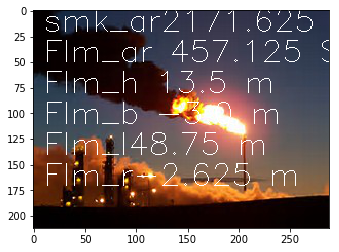

In [22]:
result = image
flare_tip_dia = 1.5 # assume that 10 meters is the flare tip area
tip_pixels = 4
pix_per_m = flare_tip_dia/tip_pixels #4 pix make 1.5 m 1 pix = 1.5/4
smoke_area_m = smokearea * pix_per_m # smoke area in m2
flame_area_m = flamearea * pix_per_m # flame area in m2
smkarea = 'smk_ar' + str(smoke_area_m) + ' Sq.m'
flmarea = 'Flm_ar ' + str(flame_area_m) + ' Sq.m'
flare_tip = 121 # top of flare stack pixel y coordinate
flametop = (flare_tip - minx)* pix_per_m # height of flame above tip
flamebot = (flare_tip - maxx)* pix_per_m # base of flare
flare_cent = 204 # pixel coordinate x axis for flare top center
flameleft = (flare_cent-miny) * pix_per_m
flameright = (flare_cent-maxy)* pix_per_m
flmtop = 'Flm_h ' + str(flametop) + ' m'
flmbot = 'Flm_b ' + str(flamebot) + ' m'
flmleft = 'Flm_l' + str(flameleft) + ' m'
flmright = 'Flm_r' + str(flameright) + ' m'
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(result,smkarea,(10,20), font, 1,(255,255,255),1)
cv2.putText(result,flmarea,(10,50), font, 1,(255,255,255),1)
cv2.putText(result,flmtop,(10,80), font, 1,(255,255,255),1)
cv2.putText(result,flmbot,(10,110), font, 1,(255,255,255),1)
cv2.putText(result,flmleft,(10,140), font, 1,(255,255,255),1)
cv2.putText(result,flmright,(10,170), font, 1,(255,255,255),1)
plt.imshow(result)
resultfile = './result.jpg'
mpimg.imsave(resultfile, result)            